In [180]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [181]:
def k_neareast_neighbour(df, k):
    #https://stackoverflow.com/questions/57107729/how-to-compute-multiple-euclidean-distances-of-all-points-in-a-dataset
    data = [(float(x),float(y)) for x, y in df[['X1', 'X2']].values ]
    nearest_neighbour = []
    nn_distances = []
    for point in data:
        distances = [math.sqrt((point[0]-x[0] )**2+ (point[1]-x[1])**2) for x in data]
        knn = np.argsort(distances)[1:k+1]
        nearest_neighbour.append([i for i in knn])
        nn_distances.append([distances[i] for i in knn])
    return nearest_neighbour, nn_distances


In [182]:
df = pd.read_csv('./outliers-3.csv')
k = 6
knn = k_neareast_neighbour(df, k)
nearest_neighbours_indexes = knn[0]
nearest_neighbour_distances = knn[1]

In [183]:
lrd = [(np.mean(x)) for x in nearest_neighbour_distances]
df['lrd'] = lrd

In [184]:
lof = []
for idx, nni in enumerate(nearest_neighbours_indexes):
    lof.append(np.mean([lrd[idx]/lrd[x] for x in nni]))

In [185]:
df['lof'] = lof

In [186]:
df_outlier = df[df['lof'] > 2]
df_outlier

,X1,X2,lrd,lof
35,45.00,60.00,20.854867,5.775198
43,80.00,40.50,22.443131,4.783406
50,90.50,99.90,14.543609,2.727899
51,70.00,5.00,35.280933,11.205348
62,30.00,60.50,23.270556,8.987357
92,10.70,99.30,59.401519,7.166865
111,60.50,60.50,15.841012,2.411267
123,88.89,58.43,7.057194,2.205493
132,10.00,30.00,20.616738,9.288632
157,99.00,20.00,35.688856,4.722218


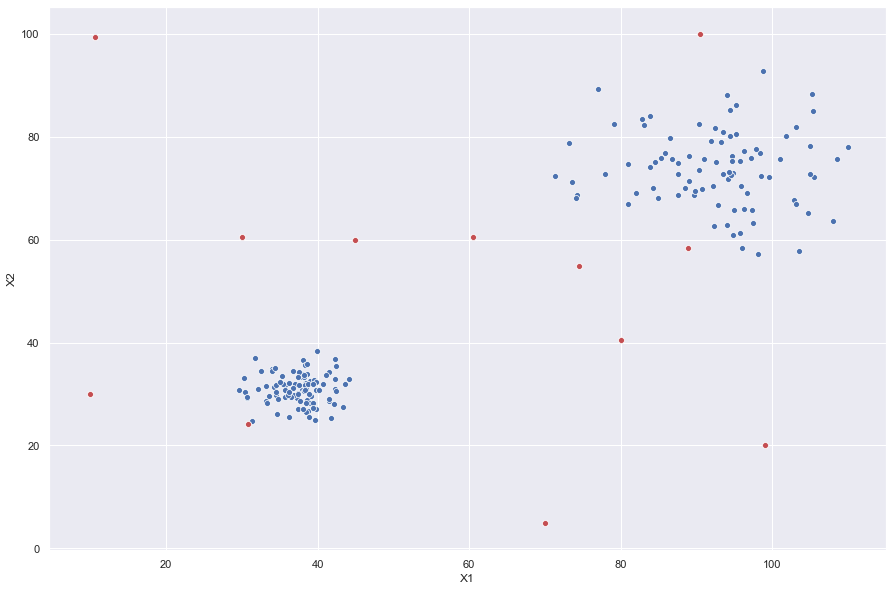

In [187]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x="X1", y="X2", data=df)
sns.scatterplot(x="X1", y="X2", data=df_outlier, color='r')